### Testing DeepLabV3+ Model on Large Satellite Imagery

In [2]:
from tensorflow import keras
model = keras.models.load_model('../models/deeplabv3.h5')

2023-02-02 18:26:29.793553: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bharathraj/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-02 18:26:29.793572: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 18:26:29.793590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bharathraj-v): /proc/driver/nvidia/version does not exist
2023-02-02 18:26:29.794008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow 

In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

2023-02-02 18:26:24.088690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 18:26:24.359054: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-02 18:26:24.414136: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bharathraj/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-02-02 18

In [3]:
def predict(image_array):
    image = tf.cast(image_array, tf.float32) / 255.0
    predictions = model.predict(np.expand_dims((image), axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    pred_mask = predictions
    pred_mask = pred_mask.reshape(256,256,1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask))
    plt.show()


In [4]:
from osgeo import gdal
import numpy as np
ds = gdal.Open("../data/RVCE_satellite_image.tif")
channel1 = np.array(ds.GetRasterBand(1).ReadAsArray())
channel2 = np.array(ds.GetRasterBand(2).ReadAsArray())
channel3 = np.array(ds.GetRasterBand(3).ReadAsArray())

image = np.dstack((channel1, channel2, channel3))


ERROR 1: libarrow.so.1000: cannot open shared object file: No such file or directory
ERROR 1: libarrow.so.1000: cannot open shared object file: No such file or directory
ERROR 1: libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
ERROR 1: libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
ERROR 1: libarrow_dataset.so.1000: cannot open shared object file: No such file or directory
ERROR 1: libarrow_dataset.so.1000: cannot open shared object file: No such file or directory
ERROR 1: libnetcdf.so.19: cannot open shared object file: No such file or directory
ERROR 1: libnetcdf.so.19: cannot open shared object file: No such file or directory
ERROR 1: libarrow.so.1000: cannot open shared object file: No such file or directory
ERROR 1: libarrow.so.1000: cannot open shared object file: No such file or directory
ERROR 1: libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
ERROR 1: libpodofo.so.0.9.8: cannot open shar

In [5]:
image.shape

(32812, 44033, 3)

In [6]:
## a function to compress the image into a lower resolution

def compress_image(image, scale):
    return cv2.resize(image, (0,0), fx=scale, fy=scale)

compressed_image = compress_image(image, 0.009)

In [7]:
image.shape

(32812, 44033, 3)

In [8]:
compressed_image.shape

(295, 396, 3)

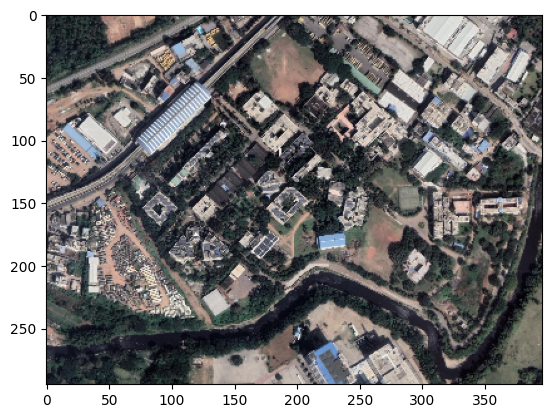

In [9]:
plt.imshow(compressed_image)

In [10]:
## split the image into 256x256 patches

def split_image(image, patch_size):
    patches = []
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            patches.append(image[i:i+patch_size, j:j+patch_size, :])
    return patches

patches = split_image(compressed_image, 256)

In [206]:
compressed_image = compress_image(image, 0.039)
patches = split_image(compressed_image, 256)

In [207]:
compressed_image.shape

(1280, 1717, 3)

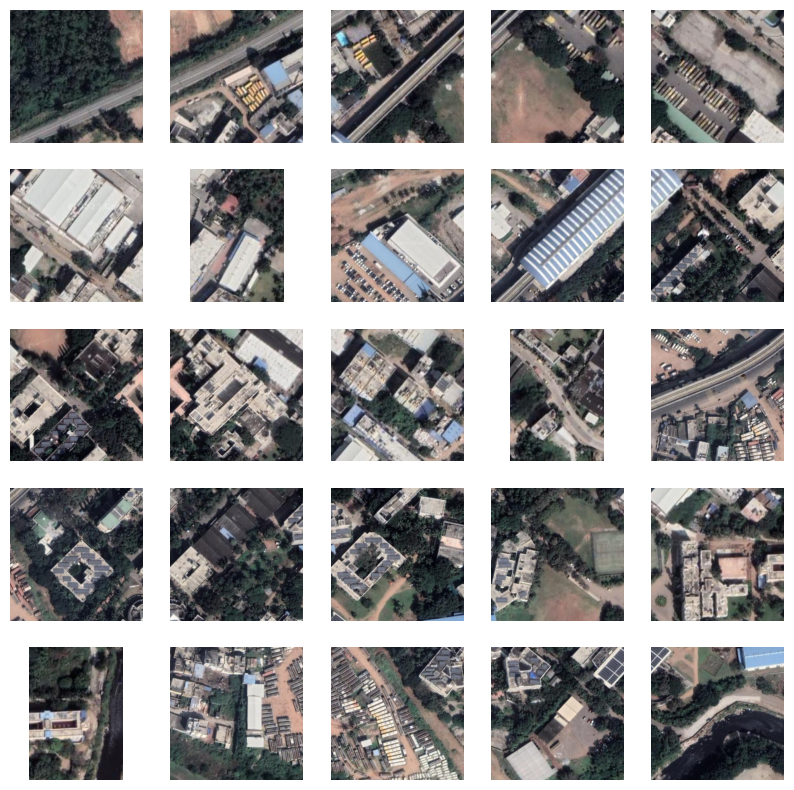

In [208]:
## subplots to show the patches

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(patches[i*5+j])
        ax[i, j].axis('off')

In [209]:
len(patches)

35

In [210]:
patches = [ i for i in patches if i.shape == (256,256,3)]

In [211]:
len(patches)

30

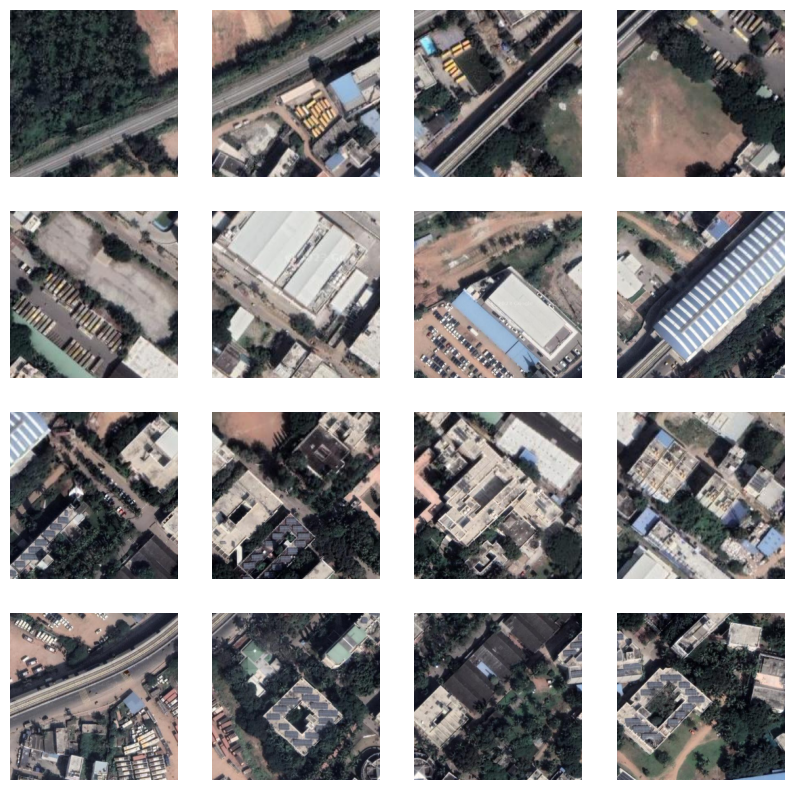

In [212]:
## subplots to show the patches

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(patches[i*4+j])
        ax[i, j].axis('off')

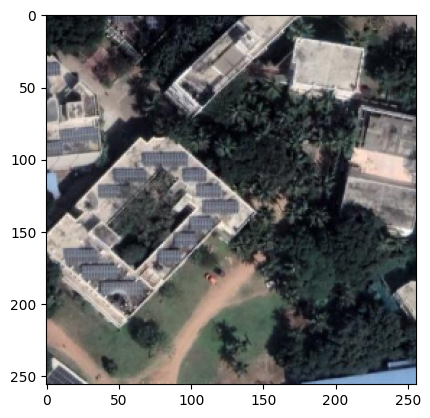

In [214]:
plt.imshow(patches[15])

In [215]:
from PIL import Image

In [216]:
def predict(image_array):
    image = tf.cast(image_array, tf.float32) / 255.0
    predictions = model.predict(np.expand_dims((image), axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    pred_mask = predictions
    pred_mask = pred_mask.reshape(256,256,1)
    ## plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask))
    ## save the array as image
    return pred_mask

In [217]:
def display(display_list):
    plt.figure(figsize=(12,12))
    title = ['Input Image','Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 175ms/step


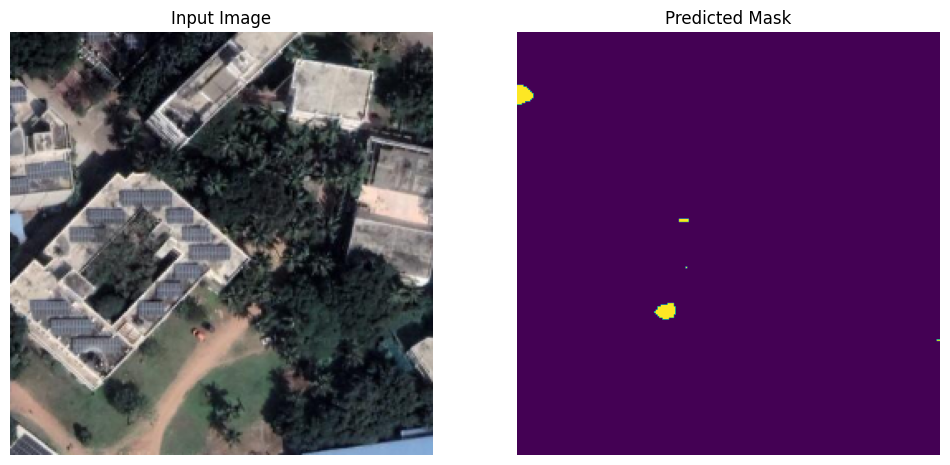

In [218]:
display([patches[15], predict(patches[15])])

The result shows some detection but the mask is not proper

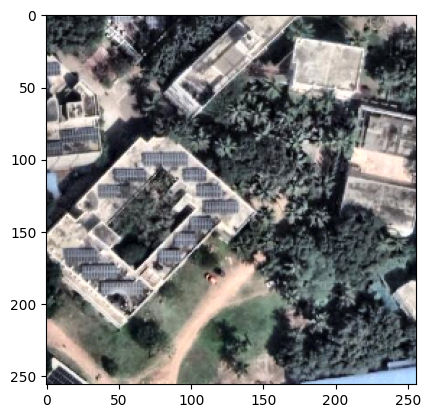

In [229]:
## color balancing the image

def color_balance(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image[:,:,0] = clahe.apply(image[:,:,0])
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    return image

sample_image = color_balance(patches[15])
plt.imshow(sample_image)



1/1 [==============================] - 0s 158ms/step


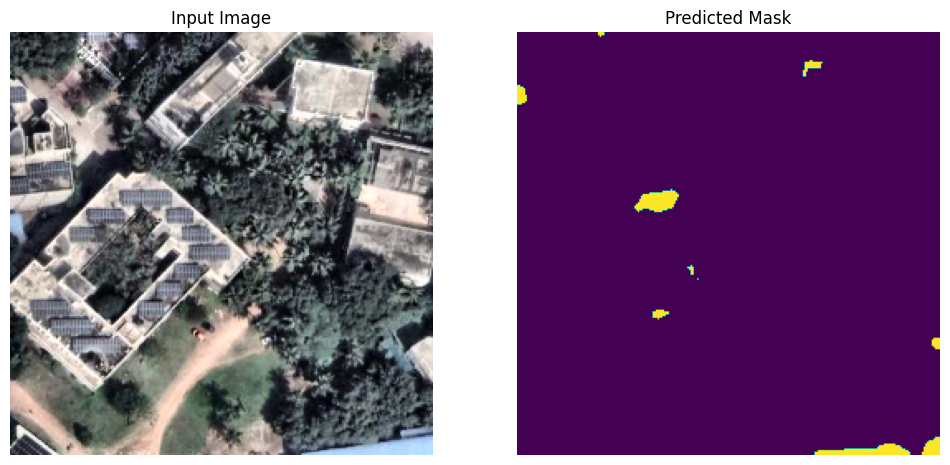

In [230]:
display([sample_image, predict(sample_image)])

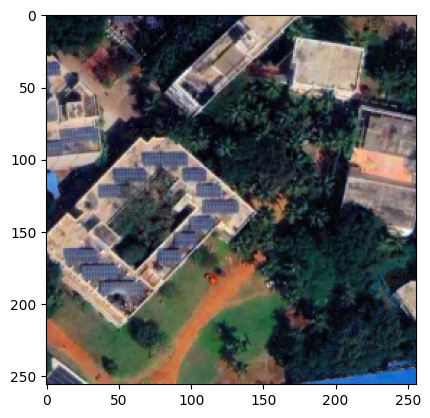

In [239]:
## increasing vibrance of the image

def increase_vibrance(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image[:,:,1] = image[:,:,1]*2.4
    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image

sample_image = increase_vibrance(patches[15])
plt.imshow(sample_image)

1/1 [==============================] - 0s 152ms/step


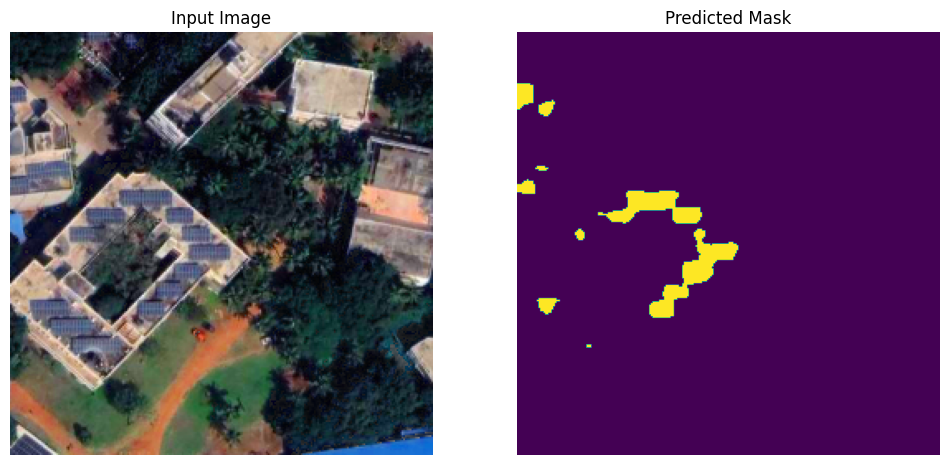

In [240]:
display([sample_image, predict(sample_image)])

Changing the color balance of the image showed significant improvement in the mask